In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## A Glimpse of the Dataset 

###### I Used only 1M data point because of RAM Limiation. 

In [2]:
order_product_prior = pd.read_csv('Data/order_products__prior.csv/order_products__prior.csv',nrows=1000000)
order_product_train = pd.read_csv('Data/order_products__train.csv/order_products__train.csv',nrows=1000000)
aisle = pd.read_csv('Data/aisles.csv/aisles.csv',nrows=1000000)
department = pd.read_csv('Data/departments.csv/departments.csv',nrows=1000000)
order = pd.read_csv('Data/orders.csv/orders.csv',nrows=1000000)
product = pd.read_csv('Data/products.csv/products.csv',nrows=1000000)

<p> Before doing the EDA let's look at the files.</p>

In [10]:
order_product_prior.head(2)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1


In [11]:
order_product_train.head(2)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1


In [12]:
aisle.head(2)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses


In [13]:
department.head(2)

,department_id,department
0,1,frozen
1,2,other


In [14]:
order.head(2)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [15]:
product.head(2)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13


<p>
    <ol>
        <li>Order_product_prior - This csv file has two unique Id's of order and product of past orders.It has the targted variable.</li>
        <li>Order_product_train - This csv is same as the prior one the only difference is, it has the recent orders of customers which we going to use for training.</li>
        <li>Order - orders.csv This file tells to which set (prior, train, test) an order belongs. You are predicting reordered items only for the test set orders.</li>
        <li>Aisle - This file tells passageway between the department.</li>
        <li>Department - This files has unique Id for each department.</li>
        <li>Product - This file tells the product name and has unique Id's of aisle and department. so we can use this Id's to find where does this product belong?</li>
    </ol>
</p>

##### Let's look at the distribution of train and test and prior 

In [20]:
cnt_set = order['eval_set'].value_counts()
cnt_set

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

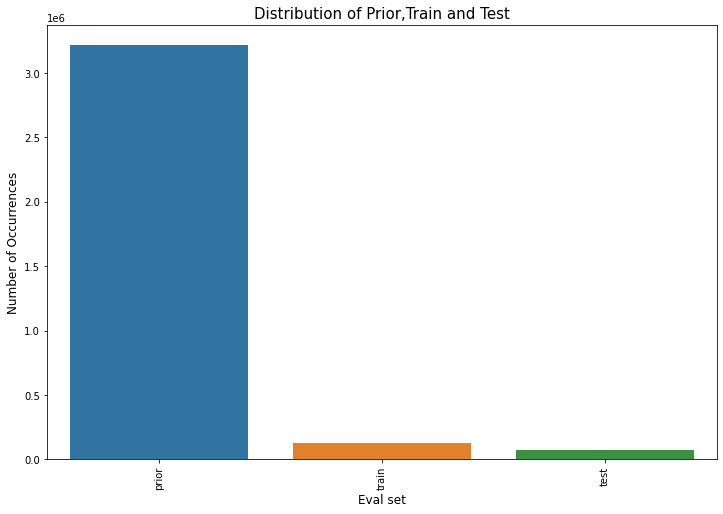

In [30]:
plt.figure(figsize=(12,8))
sns.barplot(cnt_set.index, cnt_set.values,)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set', fontsize=12)
plt.title('Distribution of Prior,Train and Test', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [41]:
cnt_srs = order.groupby("eval_set")["user_id"].agg(['nunique'])
cnt_srs

,nunique
eval_set,
prior,206209
test,75000
train,131209


<p>Here we have total 2 Lakh data points and in that 1 lakh data points for training and 75000 for test</p>


## What Is The Frequency Of Order Number Amongst The Users?

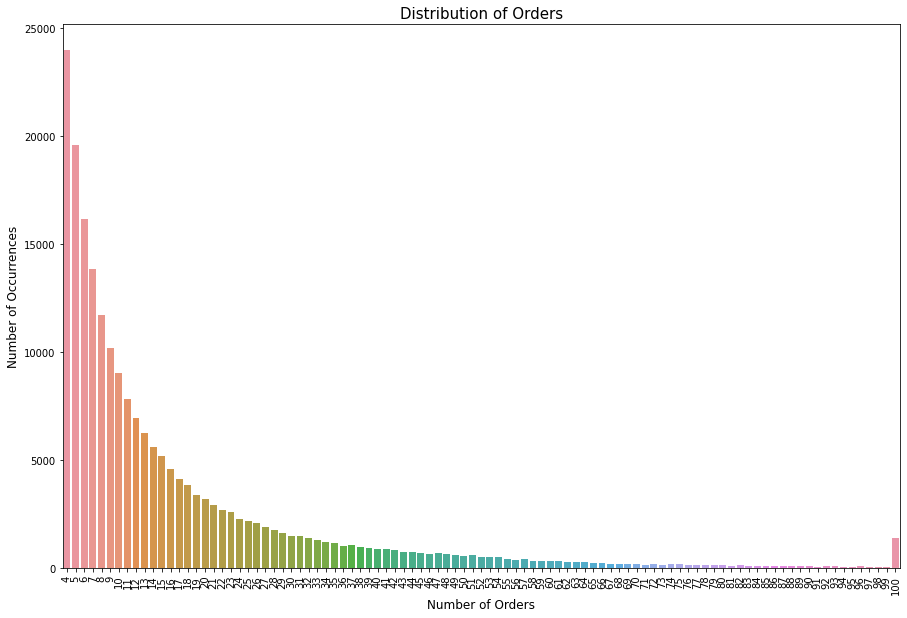

In [76]:
cnt_order = order.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_order = cnt_order.order_number.value_counts()

plt.figure(figsize=(15,10))
sns.barplot(cnt_order.index,cnt_order.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.title('Distribution of Orders', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

1. As per the barplot, Maximum time number of orders are 4 for each users. There are some users who has 100 number of orders.


2. This distribution looks like power law distribution. As per power law distribution 80% of number of orders lie within 22 number of order.

## What Day Of The Week User Placed The Order?

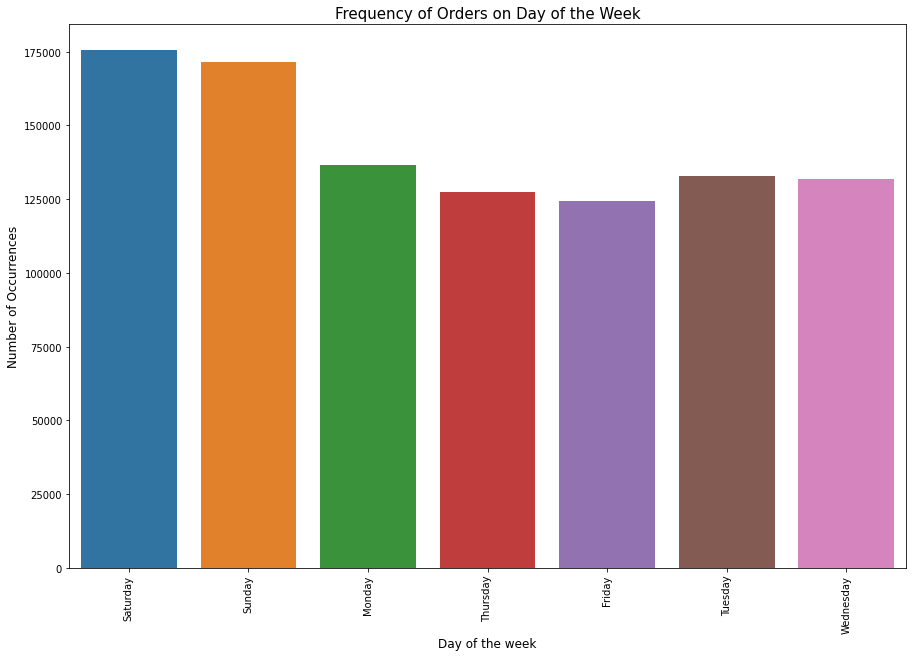

In [36]:
cnt_dow = order['order_dow'].value_counts()
label = ['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
plt.figure(figsize=(15,10))
sns.barplot(cnt_dow.index,cnt_dow.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Day of the week', fontsize=12)
plt.title('Frequency of Orders on Day of the Week', fontsize=15)
plt.xticks(ticks=cnt_dow.index,labels=label,rotation='vertical')
plt.show()

In [34]:
cnt_dow.index

Int64Index([0, 1, 2, 5, 6, 3, 4], dtype='int64')

1. There are 6 days in a week, most of the time user placed order on that starting days of the week.


2. Seems like 0 and 1 are sunday and saturday where most of users are free on that day and have time to place the orders.


3. Since after 2 dayof the week the frequency of order decreased little bit.

## In which Hour User Place Order?

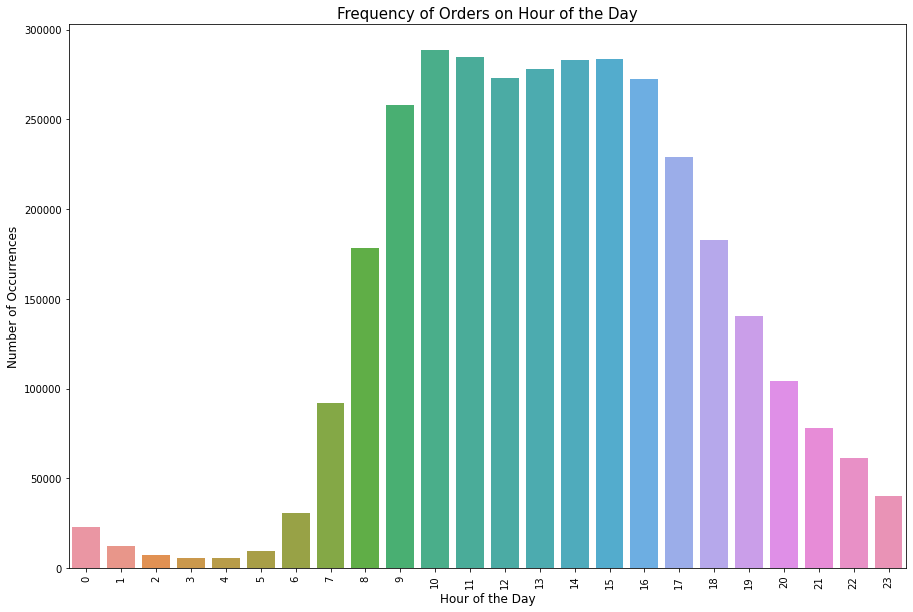

In [82]:
cnt_hour = order['order_hour_of_day'].value_counts()

plt.figure(figsize=(15,10))
sns.barplot(cnt_hour.index,cnt_hour.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour of the Day', fontsize=12)
plt.title('Frequency of Orders on Hour of the Day', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

The maximum number of order are placed between 10 to 15 Hour of the Day.

## After The Last Purchase, How Many Days The User Takes To Place a Order?

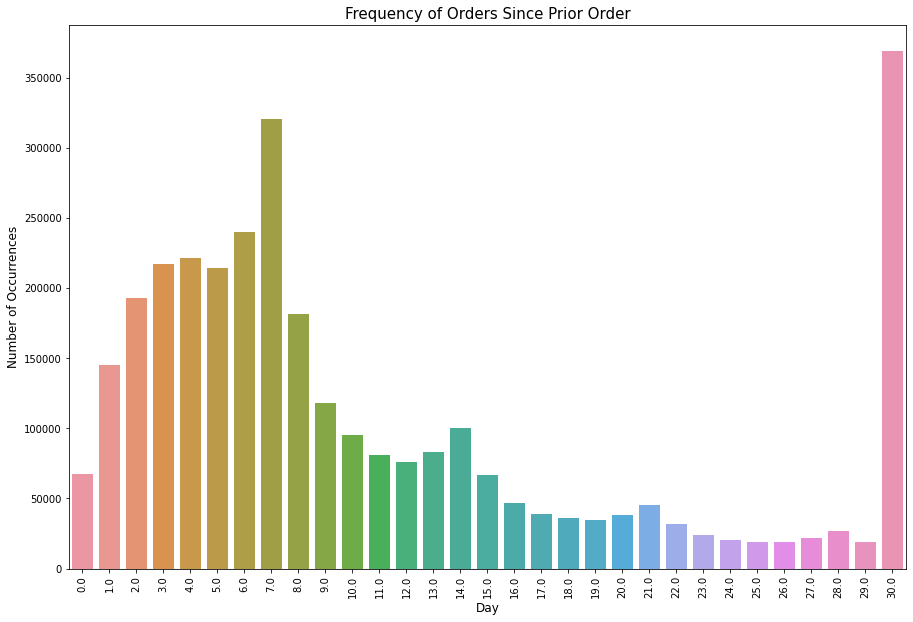

In [5]:
cnt_prior_order = order['days_since_prior_order'].value_counts()

plt.figure(figsize=(15,10))
sns.barplot(cnt_prior_order.index,cnt_prior_order.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.title('Frequency of Orders Since Prior Order', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

1. This chart tell us that most of the users place order once in weeks becuase there is high peak at 7th day and then 30th day.


2. There is also a peak at 14th day which also tell us that the users tends to order after week.

## How Many Unique Products and Department in the Data?


how many unique Products are in the Data?

In [9]:
print(f'Unique Number of Products :{len(product.product_name.unique())}')

Unique Number of Products :49688


How many unique Department in the Data?

In [11]:
print(f'Unique Number of Department :{len(department.department.unique())}')

Unique Number of Department :21


How many unique Aisle in the Data?

In [12]:
print(f'Unique Number of Aisle :{len(aisle.aisle.unique())}')

Unique Number of Aisle :134


###### Now using the primary ID's of the Products, Aisle and Department we will merge them into one Dataframe so we can explore the distribution and bheaviour of customers towards their orders.

In [4]:
df = pd.merge(order_product_prior,product,on=['product_id','product_id'])

df = pd.merge(df,aisle,on=['aisle_id','aisle_id'])

df = pd.merge(df,department,on=['department_id','department_id'])

df = pd.merge(df,order,on=['order_id','order_id'])
df.head(1)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,120,33120,13,0,Organic Egg Whites,86,16,eggs,dairy eggs,23750,prior,11,6,8,10.0


## How Often User Reorder The Same Item?

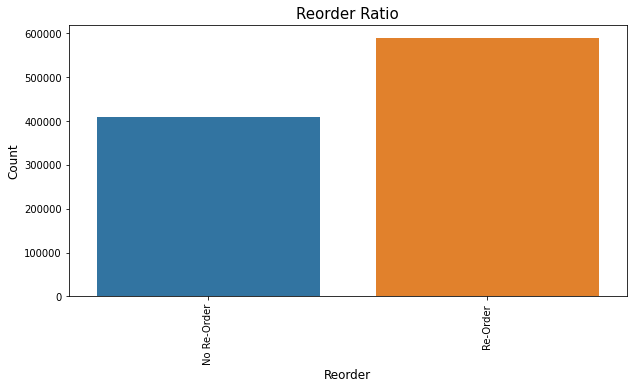

In [21]:
reorder_ratio = order_product_prior['reordered'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(reorder_ratio.index,reorder_ratio.values)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Reorder', fontsize=12)
plt.title('Reorder Ratio', fontsize=15)
plt.xticks(ticks=reorder_ratio.index,labels=['Re-Order','No Re-Order'],rotation='vertical')
plt.show()

## Top Selling Products

In [11]:
pr_count = df["product_id"].value_counts().to_frame()
pr_count["count"] = pr_count.product_id
pr_count["product_id"] = pr_count.index
pr_merge = pd.merge(pr_count,product,how="left",on="product_id").sort_values(by="count",ascending=False)
pr_merge= pr_merge.drop(['aisle_id','department_id'],axis=1)

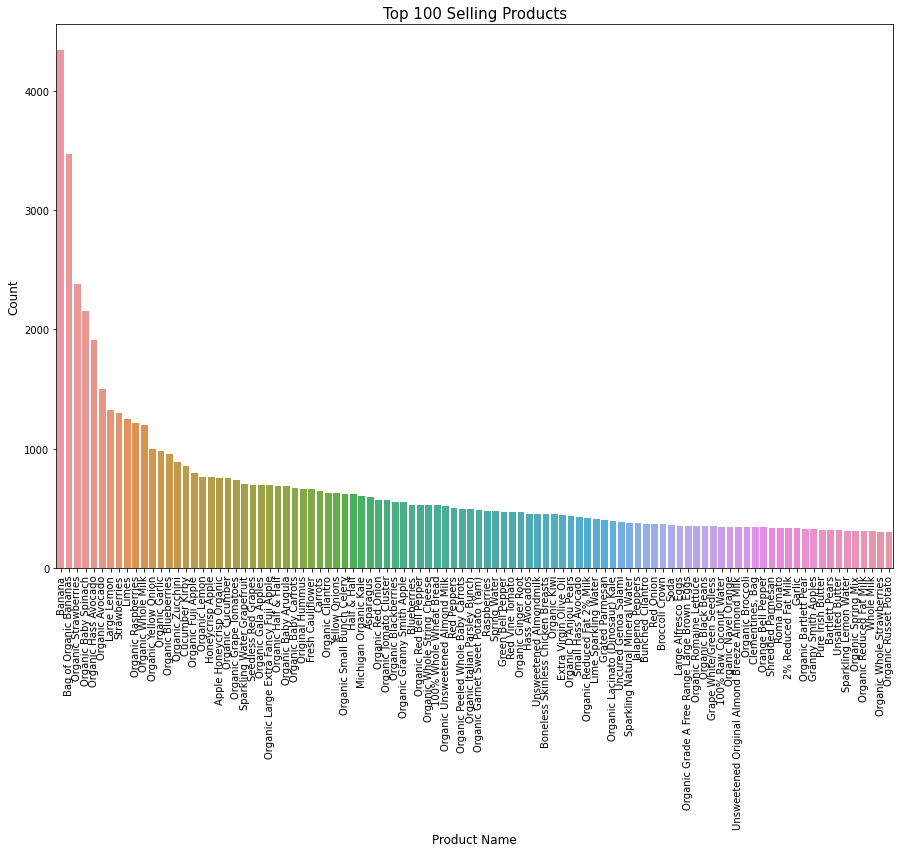

In [19]:
plt.figure(figsize=(15,10))
sns.barplot(data=pr_merge.head(100),x='product_name',y='count')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Product Name', fontsize=12)
plt.title('Top 100 Selling Products', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

This are the top 100 selling products. The most selling product is Banana and Organic Banana Chips.

## Top 100 Reorderd Products

In [34]:
a=df[df['reordered']==1]['product_id'].value_counts().to_frame()
a['reorder_count'] = a.product_id
a['product_id'] = a.index
reorder = pd.merge(a,product,on='product_id',how='left').sort_values(by="reorder_count",ascending=False)
reorder= reorder.drop(['aisle_id','department_id'],axis=1)

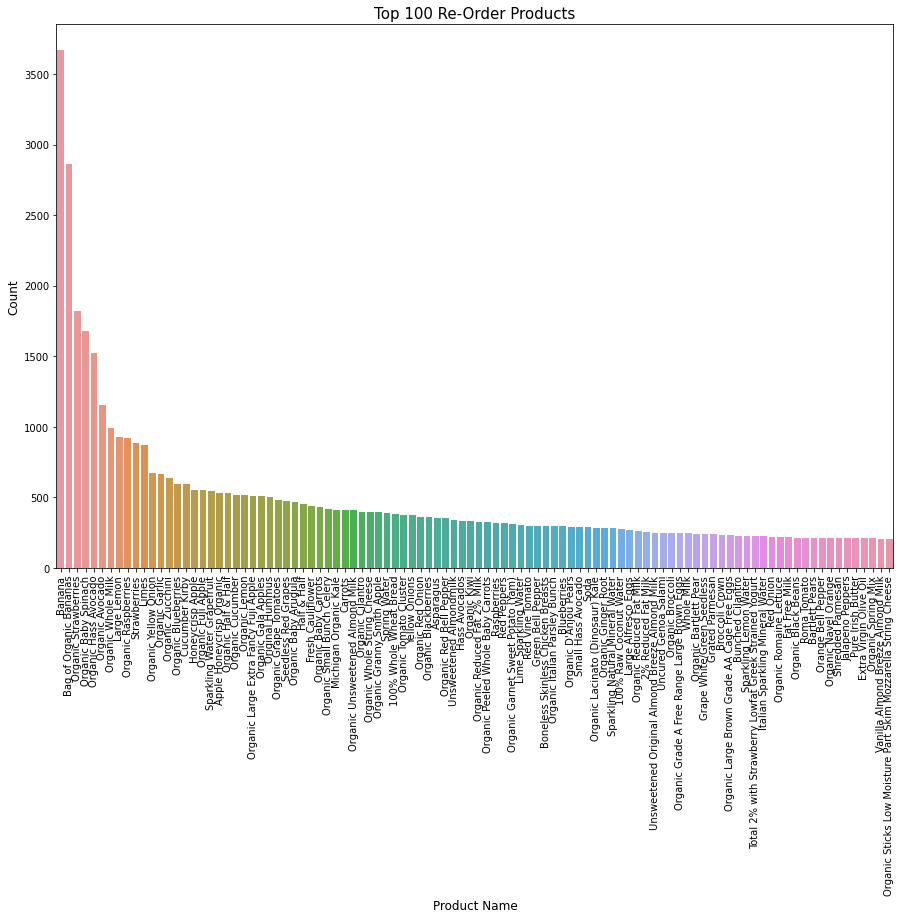

In [37]:
plt.figure(figsize=(15,10))
sns.barplot(data=reorder.head(100),x='product_name',y='reorder_count')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Product Name', fontsize=12)
plt.title('Top 100 Re-Order Products', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

1. The top 100 selling products and Top 100 reorder products barplot is almost same.


2. There is high peak on banana and oraganic banana chips looks like that that is most loving product and reorder products among users

## Which Item User Add to Cart First?

In [7]:
first_order = order_product_prior[order_product_prior['add_to_cart_order']==1]['product_id'].value_counts().to_frame()
first_order['count'] = first_order.product_id
first_order['product_id'] = first_order.index

order = pd.merge(first_order,product,on='product_id',how='left').sort_values(by="count",ascending=False)
order = order.drop(['aisle_id','department_id'],axis=1)

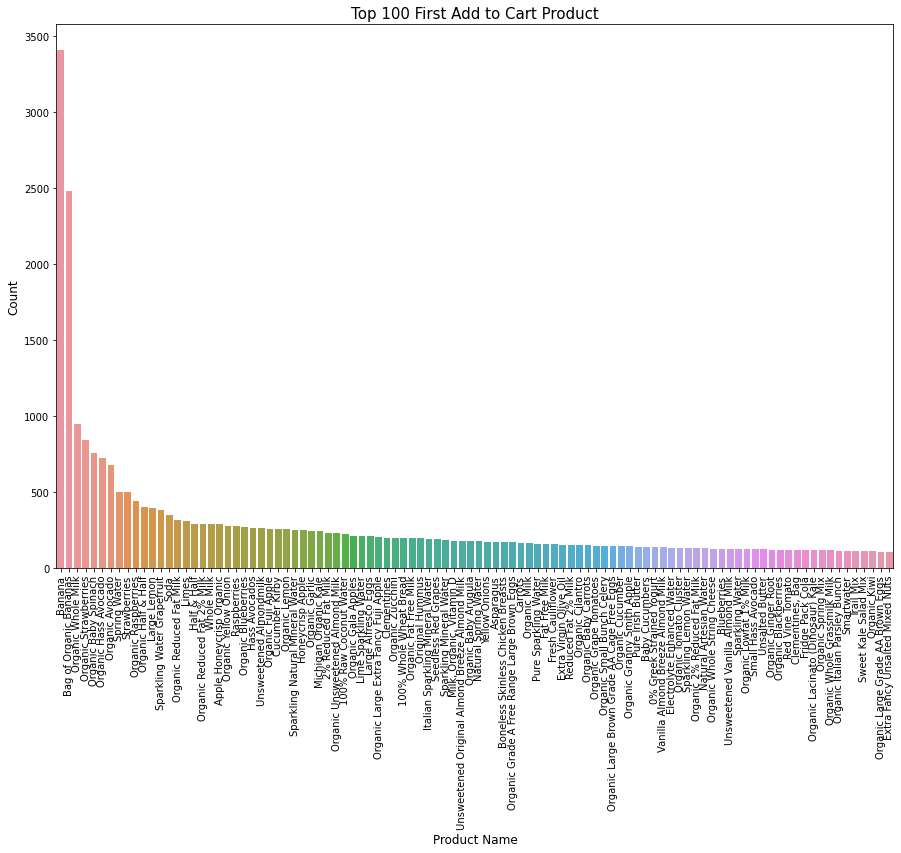

In [11]:
plt.figure(figsize=(15,10))
sns.barplot(data=order.head(100),x='product_name',y='count')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Product Name', fontsize=12)
plt.title('Top 100 First Add to Cart Product', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

1. If you see above 3 plots, all plots are almost same. 


2. Top selling,reordered and First product add to cart order product is Banana.


3. From all this plot, the demand for produce product are high than any other Department,

## Top Departments

In [43]:
depart = df['department_id'].value_counts().to_frame()
depart['count'] = depart['department_id']
depart['department_id'] = depart.index
dep_merge = pd.merge(depart,department,on='department_id',how='left').sort_values(by='count',ascending=False)

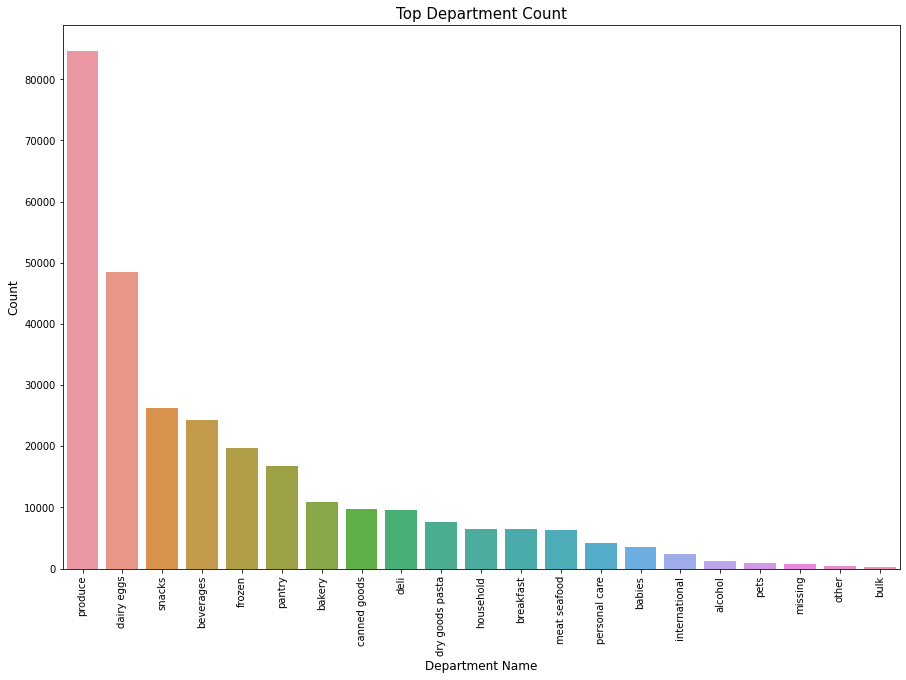

In [46]:
plt.figure(figsize=(15,10))
sns.barplot(data=dep_merge,x='department',y='count')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Department Name', fontsize=12)
plt.title('Top Department Count', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

1. The First 2 Department have very high peak than any other department.


2. As the First 2 Department are most important for any users because the Prodcue Department are about farm,crops and fruits and eggs are essiental the breakfast.

In [3]:
orde = pd.merge(order,order_product_prior,on='order_id',how='left')
orde.head(1)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,NaN,NaN,NaN


## At What Time User Place Order Again?

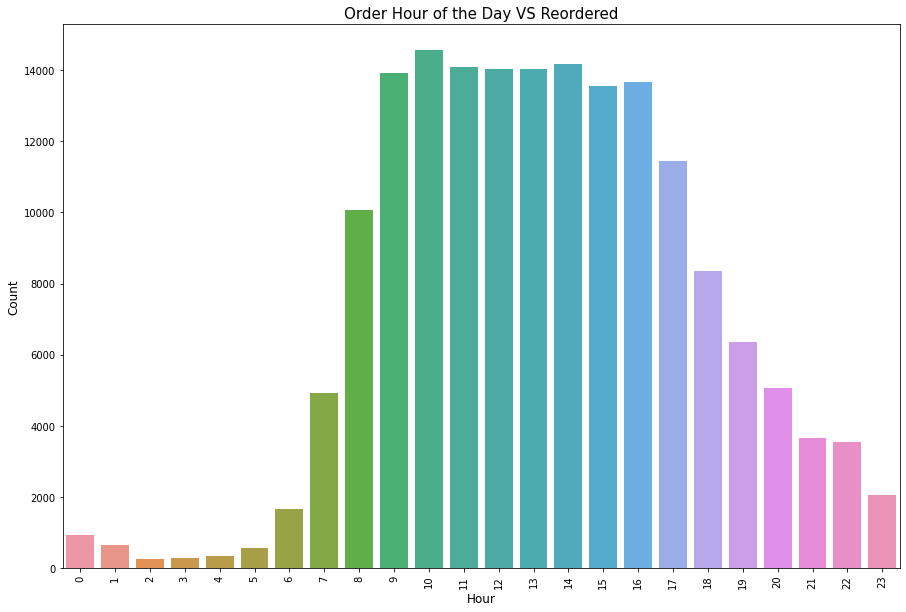

In [18]:
a = orde[orde['reordered']==1]['order_hour_of_day'].value_counts().to_frame()
a['reorder_count'] = a.order_hour_of_day
a['hours'] = a.index

plt.figure(figsize=(15,10))
sns.barplot(data=a,x='hours',y='reorder_count')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.title('Order Hour of the Day VS Reordered', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

1. Here I plot at what time most reordered products are placed. Most of the orders are placed between 8'0 clock in the morning and 5'0 clock in the evening.


2. This plot is almost same as Frequency of the order day. It shows user tends to order/reorder between this hours. This feature could help to predict reorder.

## At What Day Most User Place Order Again?

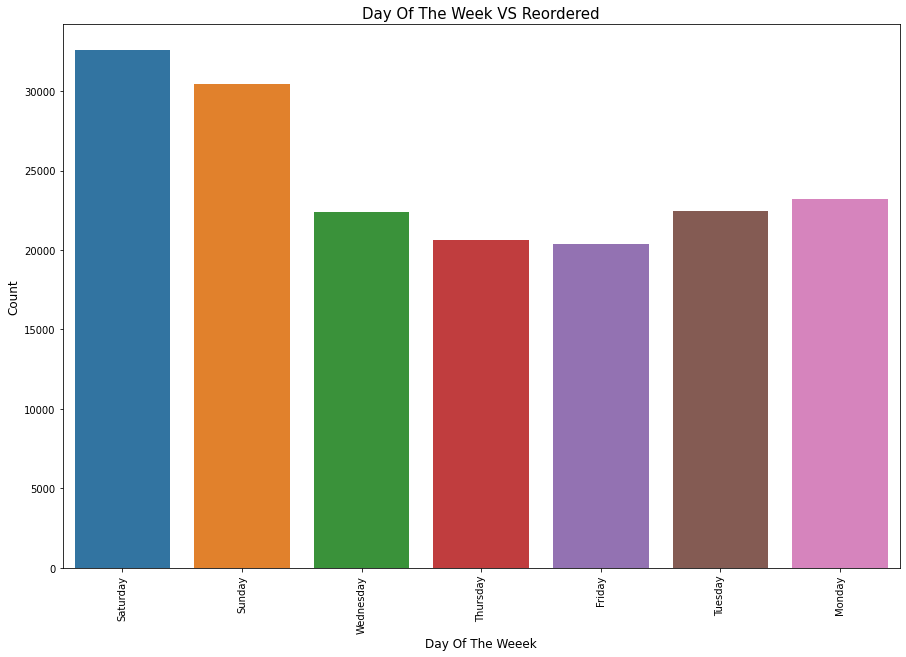

In [24]:
a = orde[orde['reordered']==1]['order_dow'].value_counts().to_frame()
a['reorder_count'] = a.order_dow
a['dow'] = a.index
label = ['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']

plt.figure(figsize=(15,10))
sns.barplot(data=a,x='dow',y='reorder_count')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day Of The Weeek', fontsize=12)
plt.title('Day Of The Week VS Reordered', fontsize=15)
plt.xticks(rotation='vertical',ticks=a.index,labels=label)
plt.show()

1. The Order and Re-Order ration are almost same. The user tends to place order again on Saturday and Sunday.


2. This Feature tells us that Saturday and Sunday have the high ratio of Order/Re-Order getting placed.

## Add To Cart Order VS Reordered

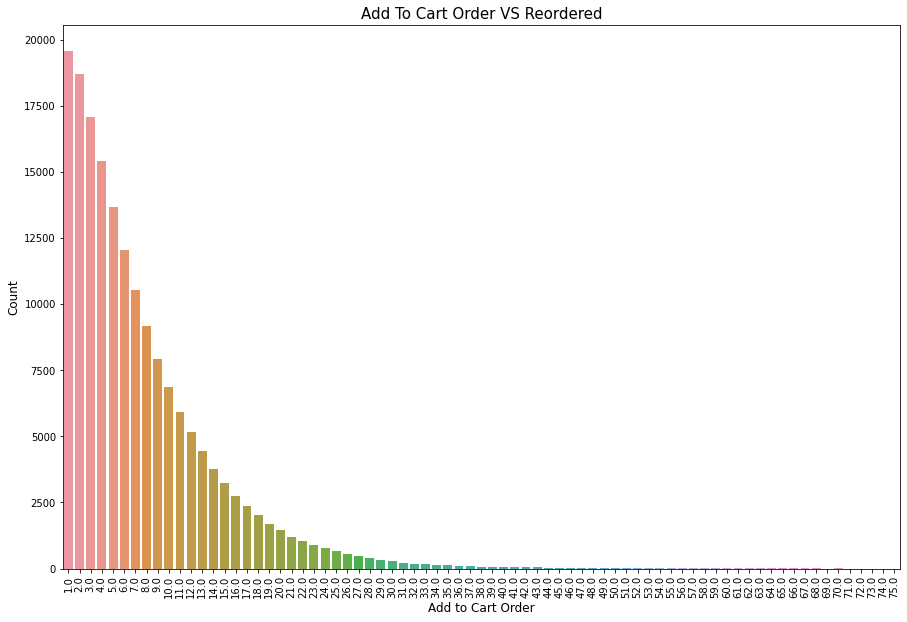

In [31]:
a = orde[orde['reordered']==1]['add_to_cart_order'].value_counts().to_frame()
a['reorder_count'] = a.add_to_cart_order
a['order_number'] = a.index

plt.figure(figsize=(15,10))
sns.barplot(data=a,x='order_number',y='reorder_count')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Add to Cart Order', fontsize=12)
plt.title('Add To Cart Order VS Reordered', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

1. The order which are added at 1th and 4th position in the cart have high chance of Re-Order by users.

2. This Distrubtion looks like Power Law which states 80% of Re-Order are between 1 to 15th position in the cart.

## Reorder Ratio of Day of the Week Vs Hour of the Day

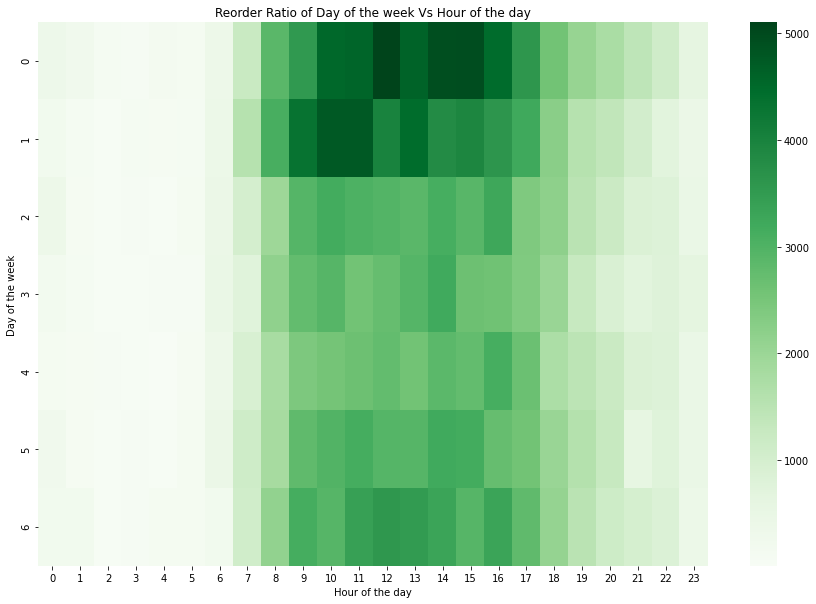

In [18]:
grp = orde.groupby(['order_dow','order_hour_of_day'])['reordered'].aggregate('count').reset_index()
grp = grp.pivot(index='order_dow',columns='order_hour_of_day',values='reordered')
plt.figure(figsize=(15,10))
sns.heatmap(grp,cmap='Greens')
plt.title("Reorder Ratio of Day of the week Vs Hour of the day")
plt.xlabel('Hour of the day')
plt.ylabel('Day of the week')
plt.show()

1. This Heatmap tells everything, Lot of users place order on Saturday and Sunday in between 10'clock to 15'clock.


2. This Feature helpful for user bheaviour and also for reorder.

In [19]:
df = pd.merge(order_product_prior,product,on=['product_id','product_id'])

df = pd.merge(df,department,on=['department_id','department_id'])

df = pd.merge(df,order,on=['order_id','order_id'])
df.head(1)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,120,33120,13,0,Organic Egg Whites,86,16,dairy eggs,23750,prior,11,6,8,10.0


## Top Reordered Department

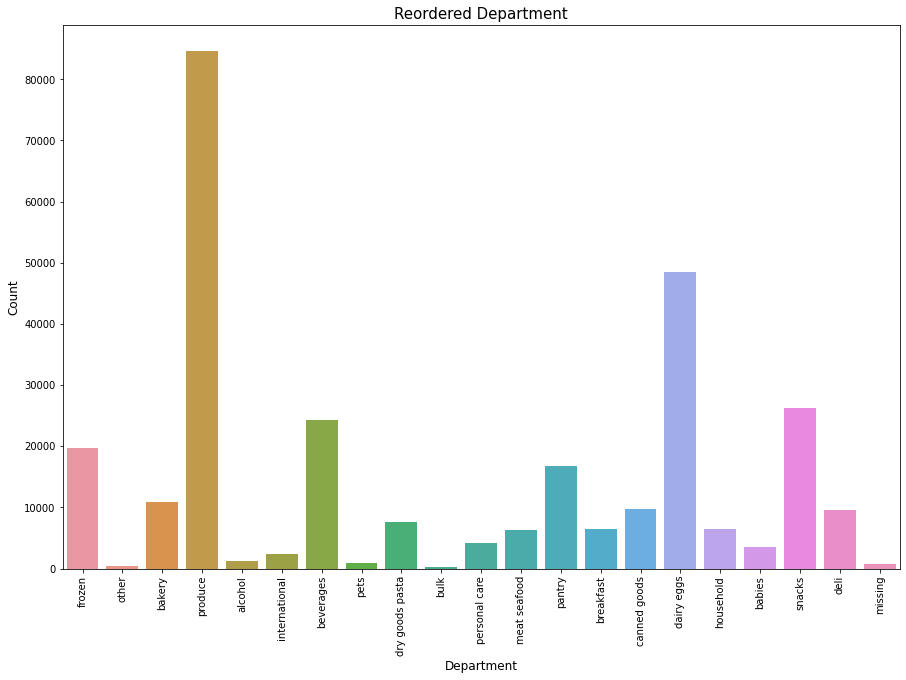

In [24]:
grp = df.groupby(['department_id','department'])['reordered'].aggregate('count').reset_index()
grp['reorder_count'] = grp.reordered
grp['dept'] = grp.department

plt.figure(figsize=(15,10))
sns.barplot(data=grp,x='dept',y='reorder_count')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title('Reordered Department', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

1. Most Users reorder from Produce and Dairy Eggs Department as they are essential for every day that's why they have high peak than any other department.


##### Reference:

https://www.kaggle.com/philippsp/exploratory-analysis-instacart

The reason I have not done Pairplot and Correlation Between the features, there are lot of features in the data and here the task in the EDA is to understand user bheaviour. we can find insights like Which items or What day or What time the user orders? or Which items are popular?. Favourite items of users so we can personlize their cart. 


There are lot of features have same distribution in the case of order and reorder ratio and that makes them useful for the task.

All this Question I answered in this notebook.